In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## for color pictures
from tensorflow.keras.datasets import cifar10

In [5]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

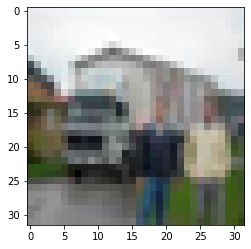

In [8]:
plt.imshow(x_train[16])

In [14]:
#normalize the input data
x_test=x_test/255
x_train=x_train/255

In [26]:
x_train.shape

(50000, 32, 32, 3)

In [19]:
from tensorflow.keras.utils import to_categorical

In [20]:
y_train_cat=to_categorical(y_train,10)
y_test_cat=to_categorical(y_test,10)

In [28]:
## define the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [29]:
model=Sequential()
# 1st convulation layer
model.add(Conv2D(filters=32,kernel_size=(4,4),activation='relu',input_shape=(32,32,3)))
# 1st maxpool layer
model.add(MaxPooling2D())
# 2nd convulation layer
model.add(Conv2D(filters=32,kernel_size=(4,4),activation='relu',input_shape=(32,32,3)))
# 2nd maxpool layer
model.add(MaxPooling2D())
## flatten the input 
model.add(Flatten())

## fully connected layer
model.add(Dense(256,activation="relu"))

## output layer 
model.add(Dense(10,activation="softmax"))

#compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

In [36]:
early_stopping=EarlyStopping(monitor='val_loss',patience=3)

In [37]:
model.fit(x=x_train,y=y_train_cat,epochs=15,validation_data=(x_test,y_test_cat),callbacks=early_stopping)

Epoch 1/15
1563/1563 [==============================] - 29s 18ms/step - loss: 1.5179 - accuracy: 0.4496 - val_loss: 1.2588 - val_accuracy: 0.5524
Epoch 2/15
1563/1563 [==============================] - 32s 21ms/step - loss: 1.1791 - accuracy: 0.5829 - val_loss: 1.1509 - val_accuracy: 0.5902
Epoch 3/15
1563/1563 [==============================] - 33s 21ms/step - loss: 1.0384 - accuracy: 0.6340 - val_loss: 1.0424 - val_accuracy: 0.6382
Epoch 4/15
1563/1563 [==============================] - 32s 21ms/step - loss: 0.9337 - accuracy: 0.6737 - val_loss: 0.9892 - val_accuracy: 0.6573
Epoch 5/15
1563/1563 [==============================] - 32s 20ms/step - loss: 0.8455 - accuracy: 0.7046 - val_loss: 1.0014 - val_accuracy: 0.6581
Epoch 6/15
1563/1563 [==============================] - 32s 20ms/step - loss: 0.7745 - accuracy: 0.7289 - val_loss: 0.9558 - val_accuracy: 0.6770
Epoch 7/15
1563/1563 [==============================] - 32s 20ms/step - loss: 0.7120 - accuracy: 0.7517 - val_loss: 0.9432 -

In [38]:
loss=pd.DataFrame(model.history.history)

<AxesSubplot:>

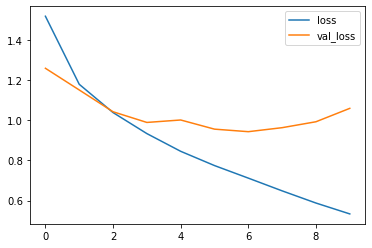

In [44]:
loss[['loss','val_loss']].plot()

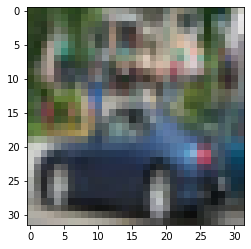

In [69]:
plt.imshow(x_test[122])

In [63]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [70]:
class_names[np.argmax(model.predict(x_test[122].reshape(1,32,32,3)))]

'automobile'